In [1]:
import subprocess
from io import BytesIO
from pathlib import Path
from zipfile import ZipFile

import requests
import geopandas as gd
import pandas as pd
import numpy as np

In [2]:
BASE_DIR = Path().cwd().parent
DATA_DIR = BASE_DIR.joinpath("data")
INPUT_DIR = DATA_DIR.joinpath("raw")
OUTPUT_DIR = DATA_DIR.joinpath("processed")
LOCAL_SHP_DIR = BASE_DIR.joinpath("shp")

## Extract

In [3]:
# Crosswalk Between 2010 and 2020 US Census Tracts 
# CENSUS_CROSSWALK_URL = "https://opportunityinsights.org/wp-content/uploads/2021/05/us_tract_2010_2020_crosswalk.csv"

In [4]:
# Neighborhood Characteristics by Census Tract 
NEIGHBORHOOD_DATA_URL = "https://opportunityinsights.org/wp-content/uploads/2018/10/tract_covariates.csv"

# All Outcomes by Census Tract, Race, Gender and Parental Income Percentile 
OUTCOMES_DATA_URL = "https://opportunityinsights.org/wp-content/uploads/2018/10/tract_outcomes.zip"

Source: https://opportunityinsights.org/data/?geographic_level=99&topic=0&paper_id=0#resource-listing

In [5]:
for directory in [DATA_DIR, INPUT_DIR, OUTPUT_DIR]:
    Path.mkdir(directory, exist_ok=True)

In [6]:
neighborhood_csv = INPUT_DIR.joinpath("tract_covariates.csv")
outcomes_csv = INPUT_DIR.joinpath("tract_outcomes_early.csv")

In [7]:
%%time
if not neighborhood_csv.exists():
    print("fetching neighborhood data...")
    csv_res = requests.get(NEIGHBORHOOD_DATA_URL)
    if csv_res.ok:
        print(f"  saving to {neighborhood_csv}...")
        with open(neighborhood_csv, "w") as f:
            f.write(csv_res.text)

fetching neighborhood data...
  saving to /Users/cotopaxi/Code/Projects/outlier/data/raw/tract_covariates.csv...
CPU times: user 107 ms, sys: 48.1 ms, total: 155 ms
Wall time: 636 ms


In [8]:
pd.read_csv(neighborhood_csv, nrows=5)

,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,1,1,20100,11101,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,...,0.250980,0.273034,0.567308,83.500000,0.038233,10109,3396,504.75183,-0.006769,92.133049
1,1,1,20200,11101,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,0.392523,0.152040,0.493169,81.300003,0.089306,9948,3328,1682.17050,-0.004253,971.317870
2,1,1,20300,11101,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,...,0.244856,0.205534,0.578560,79.500000,-0.177743,10387,3230,1633.41390,0.014218,340.920070
3,1,1,20400,11101,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,0.190722,0.350673,0.596501,83.500000,-0.072311,12933,3635,1780.03250,-0.019841,207.386370
4,1,1,20500,11101,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,0.168000,0.250496,0.661268,77.300003,-0.096140,12933,3635,2446.26220,0.018627,800.272640


In [9]:
%%time
if not outcomes_csv.exists():
    print("fetching outcomes data... (warning: large dataset!)")
    zip_res = requests.get(OUTCOMES_DATA_URL)
    if zip_res.ok:
        print(f"  saving to {outcomes_csv}...")
        outcome_zip = ZipFile(BytesIO(zip_res.content))
        outcome_zip.extractall(INPUT_DIR)

fetching outcomes data... (warning: large dataset!)
  saving to /Users/cotopaxi/Code/Projects/outlier/data/raw/tract_outcomes_early.csv...
CPU times: user 13.2 s, sys: 2.52 s, total: 15.7 s
Wall time: 29.5 s


In [10]:
pd.read_csv(outcomes_csv, nrows=5)

,state,county,tract,kir_natam_female_p1,kir_natam_female_p25,kir_natam_female_p50,kir_natam_female_p75,kir_natam_female_p100,kir_natam_female_n,kir_natam_female_mean,...,jail_white_pooled_mean_se,kfr_white_pooled_mean_se,staytract_white_pooled_mean_se,staycz_white_pooled_mean_se,stayhome_white_pooled_mean_se,working_white_pooled_mean_se,kir_stycz_white_pooled_mean_se,kfr_stycz_white_pooled_mean_se,spouse_rk_white_pooled_mean_se,par_rank_white_pooled_mean_se
0,1,1,20100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007490,0.014829,0.020353,0.025752,0.019710,0.025348,0.018290,0.017890,0.018882,0.013778
1,1,1,20200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003828,0.020797,0.028821,0.041338,0.028252,0.029613,0.030380,0.028010,0.025328,0.021874
2,1,1,20300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002141,0.011726,0.016670,0.022392,0.015206,0.019161,0.015177,0.015285,0.016145,0.009353
3,1,1,20400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001777,0.010787,0.016027,0.019096,0.012477,0.016844,0.014253,0.014508,0.014396,0.009628
4,1,1,20500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000983,0.008789,0.012861,0.017491,0.010930,0.014396,0.011836,0.012748,0.010329,0.006667


## Transform

In [11]:
%%time
geo_df = gd.read_file(LOCAL_SHP_DIR.joinpath("nhgis0001_shapefile_tl2010_us_tract_2010.zip"))
geo_df.head()

CPU times: user 8.6 s, sys: 315 ms, total: 8.91 s
Wall time: 9.13 s


,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,geometry
0,06,083,002402,06083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,+34.9287963,-120.4780833,G0600830002402,1.633304e+07,19109.934868,"POLYGON ((-2190454.484 -1818.340, -2190458.553..."
1,06,083,002102,06083002102,21.02,Census Tract 21.02,G5020,S,1352551,0,+34.9421111,-120.4267767,G0600830002102,1.352547e+06,4958.900746,"POLYGON ((-2187515.087 -3474.486, -2187572.399..."
2,06,083,002009,06083002009,20.09,Census Tract 20.09,G5020,S,2603281,0,+34.8722878,-120.4277159,G0600830002009,2.603279e+06,6578.282432,"POLYGON ((-2189494.128 -10631.359, -2189516.12..."
3,06,083,002008,06083002008,20.08,Census Tract 20.08,G5020,S,3295314,0,+34.8861824,-120.4250770,G0600830002008,3.295312e+06,8848.654446,"POLYGON ((-2189029.408 -9557.208, -2189024.501..."
4,06,011,000500,06011000500,5,Census Tract 5,G5020,S,170218418,4285285,+39.3147440,-121.9636465,G0600110000500,1.745037e+08,78247.144082,"POLYGON ((-2192298.375 513039.620, -2192185.26..."


In [12]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73669 entries, 0 to 73668
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   73669 non-null  object  
 1   COUNTYFP10  73669 non-null  object  
 2   TRACTCE10   73669 non-null  object  
 3   GEOID10     73669 non-null  object  
 4   NAME10      73669 non-null  object  
 5   NAMELSAD10  73669 non-null  object  
 6   MTFCC10     73669 non-null  object  
 7   FUNCSTAT10  73669 non-null  object  
 8   ALAND10     73669 non-null  int64   
 9   AWATER10    73669 non-null  int64   
 10  INTPTLAT10  73669 non-null  object  
 11  INTPTLON10  73669 non-null  object  
 12  GISJOIN     73669 non-null  object  
 13  Shape_area  73669 non-null  float64 
 14  Shape_len   73669 non-null  float64 
 15  geometry    73669 non-null  geometry
dtypes: float64(2), geometry(1), int64(2), object(11)
memory usage: 9.0+ MB


In [13]:
len(geo_df)

73669

Match `GEOID10` column of `geo_df` with subsequent data

In [14]:
%%time
neighborhood_df = pd.read_csv(neighborhood_csv, dtype={"state": str, "county": str, "tract": str, "cz": str})
neighborhood_df.head()

CPU times: user 155 ms, sys: 19.1 ms, total: 174 ms
Wall time: 186 ms


,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,1,1,20100,11101,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,...,0.250980,0.273034,0.567308,83.500000,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049
1,1,1,20200,11101,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,0.392523,0.152040,0.493169,81.300003,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870
2,1,1,20300,11101,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,...,0.244856,0.205534,0.578560,79.500000,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070
3,1,1,20400,11101,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,0.190722,0.350673,0.596501,83.500000,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370
4,1,1,20500,11101,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,0.168000,0.250496,0.661268,77.300003,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640


In [15]:
neighborhood_df.query("tract == '900'").state.count()

234

In [16]:
neighborhood_df["state"] = neighborhood_df["state"].apply(lambda x: "0" + x if len(x) < 2 else x)
neighborhood_df["county"] = neighborhood_df["county"].apply(lambda x: "00" + x if len(x) == 1 else "0" + x if len(x) == 2 else x)
neighborhood_df["tract"] = neighborhood_df["tract"].apply(lambda x: "000" + x if len(x) == 3 else "00" + x if len(x) == 4 else "0" + x if len(x) == 5 else x)
neighborhood_df["GEOID10"] = neighborhood_df["state"] + neighborhood_df["county"] + neighborhood_df["tract"]
neighborhood_df.head()

,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,GEOID10
0,01,001,020100,11101,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,...,0.273034,0.567308,83.500000,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049,01001020100
1,01,001,020200,11101,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,0.152040,0.493169,81.300003,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870,01001020200
2,01,001,020300,11101,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,...,0.205534,0.578560,79.500000,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070,01001020300
3,01,001,020400,11101,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,0.350673,0.596501,83.500000,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370,01001020400
4,01,001,020500,11101,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,0.250496,0.661268,77.300003,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640,01001020500


In [17]:
neighborhood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74044 entries, 0 to 74043
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         74044 non-null  object 
 1   county                        74044 non-null  object 
 2   tract                         74044 non-null  object 
 3   cz                            73094 non-null  object 
 4   czname                        73094 non-null  object 
 5   hhinc_mean2000                72393 non-null  float64
 6   mean_commutetime2000          72417 non-null  float64
 7   frac_coll_plus2000            72464 non-null  float64
 8   frac_coll_plus2010            73248 non-null  float64
 9   foreign_share2010             72378 non-null  float64
 10  med_hhinc1990                 72420 non-null  float64
 11  med_hhinc2016                 72954 non-null  float64
 12  popdensity2000                72739 non-null  float64
 13  p

Check the length of the data for validation

In [18]:
len(neighborhood_df)

74044

Now that we have the data we need, we'll select a single outcome for testing/dev and export the final dataset.

[Opportunity Atlas](https://opportunityinsights.org/wp-content/uploads/2019/07/Codebook-for-Table-4.pdf) uses a nested structure to create columns like the following:

```
[outcome]_[race]_[gender]_p[pctile]
```

So, we'll pre-compute these columns for a single measure and then export the data as geojson

In [19]:
race = [
#     "pooled", 
    "white", 
    "black", 
#     "hisp", 
#     "asian", 
#     "natam", 
#     "other",
]
gender = [
    "pooled",
#     "male", 
#     "female",
]
pctile = [
#     "1", 
#     "25", 
#     "50", 
    "75", 
#     "100",
]
outcome = [
#     "kfr",
#     "kfr_top01",
#     "kfr_top20",
    "kir",
#     "kir_top01",
#     "kir_top20",
]

In [20]:
base_cols = [ "state", "county", "tract"]
join_cols = ["GEOID10"]
geo_cols = ["geometry"]

In [21]:
mean_predicted_income_cols =  np.array(
    [[[[f"{o}_{r}_{g}_p{p}" for o in outcome] for p in pctile] for r in race] for g in gender]
).flatten().tolist()

mean_predicted_income_cols

['kir_white_pooled_p75', 'kir_black_pooled_p75']

In [22]:
%%time
outcomes_df = pd.read_csv(
    outcomes_csv, 
    dtype={"state": str, "county": str, "tract": str},
    usecols=base_cols + mean_predicted_income_cols
)
outcomes_df.head()

CPU times: user 8.19 s, sys: 483 ms, total: 8.67 s
Wall time: 8.82 s


,state,county,tract,kir_black_pooled_p75,kir_white_pooled_p75
0,1,1,20100,0.658015,0.506952
1,1,1,20200,0.518223,0.587108
2,1,1,20300,0.513285,0.508197
3,1,1,20400,0.585254,0.537417
4,1,1,20500,0.573247,0.545500


In [23]:
outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73278 entries, 0 to 73277
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 73278 non-null  object 
 1   county                73278 non-null  object 
 2   tract                 73278 non-null  object 
 3   kir_black_pooled_p75  34088 non-null  float64
 4   kir_white_pooled_p75  67980 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.8+ MB


In [24]:
outcomes_df["state"] = outcomes_df["state"].apply(lambda x: "0" + x if len(x) < 2 else x)
outcomes_df["county"] = outcomes_df["county"].apply(lambda x: "00" + x if len(x) == 1 else "0" + x if len(x) == 2 else x)
outcomes_df["tract"] = outcomes_df["tract"].apply(lambda x: "000" + x if len(x) == 3 else "00" + x if len(x) == 4 else "0" + x if len(x) == 5 else x)
outcomes_df["GEOID10"] = outcomes_df["state"] + outcomes_df["county"] + outcomes_df["tract"]
outcomes_df.head()

,state,county,tract,kir_black_pooled_p75,kir_white_pooled_p75,GEOID10
0,01,001,020100,0.658015,0.506952,01001020100
1,01,001,020200,0.518223,0.587108,01001020200
2,01,001,020300,0.513285,0.508197,01001020300
3,01,001,020400,0.585254,0.537417,01001020400
4,01,001,020500,0.573247,0.545500,01001020500


Verify data length

In [25]:
len(outcomes_df)

73278

Based on the Opportunity Atlas map, there are ~1,000ish tracts that do not have outcome data likely do to low populations (think rural areas.) We'll drop these out of the data but want to account for this edge case in the interactive.

### Join data

First we'll join the CSV files together. We have more neighborhood tracts than outcome tracts so we should drop anything we don't have in our outcome data. We use a left join to keep all outcome tracts.

In [26]:
%%time
print("Merging all opportunity atlas data...")
nbr_outcome_df = pd.merge(
    outcomes_df,
    neighborhood_df,
    how="left",
    on=["GEOID10", "state", "county", "tract"],
    validate="one_to_one"
)

Merging all opportunity atlas data...
CPU times: user 142 ms, sys: 20.8 ms, total: 162 ms
Wall time: 172 ms


We should probably cut down the total column count here

In [27]:
len(nbr_outcome_df.columns)

41

In [28]:
nbr_outcome_df.head()

,state,county,tract,kir_black_pooled_p75,kir_white_pooled_p75,GEOID10,cz,czname,hhinc_mean2000,mean_commutetime2000,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,01,001,020100,0.658015,0.506952,01001020100,11101,Montgomery,68638.727,26.171911,...,0.250980,0.273034,0.567308,83.500000,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049
1,01,001,020200,0.518223,0.587108,01001020200,11101,Montgomery,57242.512,24.806705,...,0.392523,0.152040,0.493169,81.300003,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870
2,01,001,020300,0.513285,0.508197,01001020300,11101,Montgomery,75647.727,25.322525,...,0.244856,0.205534,0.578560,79.500000,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070
3,01,001,020400,0.585254,0.537417,01001020400,11101,Montgomery,74852.055,22.965347,...,0.190722,0.350673,0.596501,83.500000,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370
4,01,001,020500,0.573247,0.545500,01001020500,11101,Montgomery,96174.766,26.222353,...,0.168000,0.250496,0.661268,77.300003,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640


In [29]:
nbr_outcome_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73278 entries, 0 to 73277
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         73278 non-null  object 
 1   county                        73278 non-null  object 
 2   tract                         73278 non-null  object 
 3   kir_black_pooled_p75          34088 non-null  float64
 4   kir_white_pooled_p75          67980 non-null  float64
 5   GEOID10                       73278 non-null  object 
 6   cz                            72473 non-null  object 
 7   czname                        72473 non-null  object 
 8   hhinc_mean2000                72306 non-null  float64
 9   mean_commutetime2000          72317 non-null  float64
 10  frac_coll_plus2000            72347 non-null  float64
 11  frac_coll_plus2010            72997 non-null  float64
 12  foreign_share2010             72283 non-null  float64
 13  m

How many items did we join

How many columns don't have pooled high income parent black/white columns?

### Adding geo data

Now, we'll join our geo data to our opportunity insights data

In [30]:
%%time
print("Merging opportunity atlas data with geometry...")
merge_geo_df = geo_df.merge(
    nbr_outcome_df,
    on="GEOID10",
    how="left",
    validate="one_to_one",
)

Merging opportunity atlas data with geometry...
CPU times: user 139 ms, sys: 32.1 ms, total: 171 ms
Wall time: 186 ms


### Explore missing data

How many tracts don't have state columns?

In [31]:
len(nbr_outcome_df) == len(outcomes_df)

True

In [32]:
nbr_outcome_df[nbr_outcome_df["kir_black_pooled_p75"].isna() & nbr_outcome_df["kir_white_pooled_p75"].isna()].tract.count()

2210

In [33]:
missing_state_geo_df = merge_geo_df[merge_geo_df["state"].isna()]

In [34]:
missing_state_geo_df.GEOID10.count()

475

In [35]:
missing_state_geo_df[["STATEFP10"]].groupby("STATEFP10").STATEFP10.count().sort_values(ascending=False)

STATEFP10
72    179
36     43
12     30
06     26
51     17
48     16
26     14
37     13
08     11
42     10
04     10
15      9
13      7
47      7
25      7
45      6
32      6
21      6
22      5
34      4
24      4
55      4
39      3
46      3
01      3
28      3
20      3
17      3
31      2
30      2
27      2
09      2
49      2
18      2
10      1
05      1
53      1
50      1
19      1
33      1
41      1
40      1
02      1
35      1
29      1
Name: STATEFP10, dtype: int64

In [36]:
missing_state_geo_df.GEOID10.str.len().unique()

array([11])

In [37]:
nbr_outcome_df.GEOID10.str.len().unique()

array([11])

In [38]:
nbr_outcome_df[nbr_outcome_df.GEOID10.str.len() == 9]

,state,county,tract,kir_black_pooled_p75,kir_white_pooled_p75,GEOID10,cz,czname,hhinc_mean2000,mean_commutetime2000,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013


In [39]:
geo_df[geo_df["GEOID10"] == "06083002402"]

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,geometry
0,06,083,002402,06083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,+34.9287963,-120.4780833,G0600830002402,1.633304e+07,19109.934868,"POLYGON ((-2190454.484 -1818.340, -2190458.553..."


In [40]:
nbr_outcome_df[nbr_outcome_df["GEOID10"] == "06083002402"]

,state,county,tract,kir_black_pooled_p75,kir_white_pooled_p75,GEOID10,cz,czname,hhinc_mean2000,mean_commutetime2000,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
10397,06,083,002402,NaN,0.506989,06083002402,38200,Santa Barbara,57421.938,21.578176,...,0.304585,0.374162,0.620902,77.5,-0.056527,42808.0,14478.0,1813.6428,-0.004769,893.46478


### Project

NHGIS uses the albersUSA map projection for all data so we'll need to convert it to wgs 84 to work w/ web maps and make it generally easier to interop w/ other geo tools

In [41]:
merge_geo_df.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

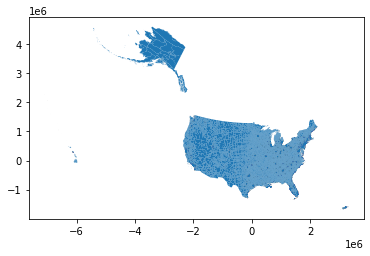

In [42]:
merge_geo_df.plot()

projecting to WGS 84...


<AxesSubplot:>

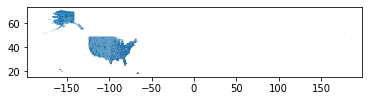

In [43]:
merge_geo_df = merge_geo_df.set_geometry("geometry")
print("projecting to WGS 84...")
projected_geo_df = merge_geo_df.to_crs("EPSG:4326")
projected_geo_df.plot()

In [44]:
projected_geo_df[["GEOID10","geometry"]].head()

,GEOID10,geometry
0,06083002402,"POLYGON ((-120.45362 34.95336, -120.45363 34.9..."
1,06083002102,"POLYGON ((-120.41758 34.94572, -120.41765 34.9..."
2,06083002009,"POLYGON ((-120.41863 34.87936, -120.41864 34.8..."
3,06083002008,"POLYGON ((-120.41669 34.88970, -120.41654 34.8..."
4,06011000500,"POLYGON ((-122.00973 39.38386, -122.00836 39.3..."


In [45]:
projected_geo_df.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,06,083,002402,06083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,...,0.304585,0.374162,0.620902,77.500000,-0.056527,42808.0,14478.0,1813.642800,-0.004769,893.464780
1,06,083,002102,06083002102,21.02,Census Tract 21.02,G5020,S,1352551,0,...,0.269058,0.553611,0.556343,77.699997,-0.261121,42513.0,14359.0,3992.337200,0.054087,3206.896500
2,06,083,002009,06083002009,20.09,Census Tract 20.09,G5020,S,2603281,0,...,0.159041,0.402431,0.552370,83.099998,0.121020,28386.0,9923.0,3806.965100,0.145349,499.502500
3,06,083,002008,06083002008,20.08,Census Tract 20.08,G5020,S,3295314,0,...,0.236659,0.453975,0.575104,80.599998,0.016928,39994.0,13906.0,5071.541000,-0.069730,574.685550
4,06,011,000500,06011000500,5,Census Tract 5,G5020,S,170218418,4285285,...,0.313889,0.434198,0.615424,82.699997,0.122113,1436.0,578.0,39.028027,0.011729,24.588417


## Load

In [46]:
output_geo_df = projected_geo_df.drop(geo_df.drop(["geometry", "GEOID10"], axis=1).columns.tolist(), axis=1)

In [47]:
output_geo_df.head()

,GEOID10,geometry,state,county,tract,kir_black_pooled_p75,kir_white_pooled_p75,cz,czname,hhinc_mean2000,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,06083002402,"POLYGON ((-120.45362 34.95336, -120.45363 34.9...",06,083,002402,NaN,0.506989,38200,Santa Barbara,57421.938,...,0.304585,0.374162,0.620902,77.500000,-0.056527,42808.0,14478.0,1813.642800,-0.004769,893.464780
1,06083002102,"POLYGON ((-120.41758 34.94572, -120.41765 34.9...",06,083,002102,NaN,0.576493,38200,Santa Barbara,71253.547,...,0.269058,0.553611,0.556343,77.699997,-0.261121,42513.0,14359.0,3992.337200,0.054087,3206.896500
2,06083002009,"POLYGON ((-120.41863 34.87936, -120.41864 34.8...",06,083,002009,NaN,0.532976,38200,Santa Barbara,99148.039,...,0.159041,0.402431,0.552370,83.099998,0.121020,28386.0,9923.0,3806.965100,0.145349,499.502500
3,06083002008,"POLYGON ((-120.41669 34.88970, -120.41654 34.8...",06,083,002008,NaN,0.548938,38200,Santa Barbara,90941.711,...,0.236659,0.453975,0.575104,80.599998,0.016928,39994.0,13906.0,5071.541000,-0.069730,574.685550
4,06011000500,"POLYGON ((-122.00973 39.38386, -122.00836 39.3...",06,011,000500,NaN,0.609962,37300,Chico,54146.016,...,0.313889,0.434198,0.615424,82.699997,0.122113,1436.0,578.0,39.028027,0.011729,24.588417


Export to geojson

In [48]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [49]:
output_geojson = INPUT_DIR.joinpath("dev-tracts-geo.json")
print("Exporting geojson...")
output_geo_df.to_file(output_geojson, driver="GeoJSON")

Exporting geojson...


/Users/cotopaxi/.local/share/virtualenvs/outlier-aYHeDvLw/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


We have a file but it's HUGE! (~1.4 GB.) Most of this can be attributed to the geometry. Let's simplify it and export it as topojson.

We _could_ use geopandas for this but I find [mapshaper](https://github.com/mbloch/mapshaper) much better at handling simplification algorithims and general munging of geo data outside of the memory-intensive join steps.

### generate geojson

In [50]:
dev_geojson = OUTPUT_DIR.joinpath("dev-tracts-simplified-geo.json")

In [51]:
# npx mapshaper-xl -i data/processed/dev-tracts-geo.json -simplify 16.9% -o data/processed/dev-tracts-simplified-geo.json format=geojson
cmd = subprocess.run([
    "npx", "mapshaper-xl", 
        "-i", output_geojson,
        "-simplify", "16.9%",
        "-o", dev_geojson,
], capture_output=True)

print(f"Generated {dev_geojson}")

Generated /Users/cotopaxi/Code/Projects/outlier/data/processed/dev-tracts-simplified-geo.json


### generate topojson

In [52]:
dev_topojson = OUTPUT_DIR.joinpath("dev-tracts-simplified-topo.json")

In [ ]:
cmd = subprocess.run([
    "npx", "mapshaper-xl", 
        "-i", output_geojson,
        "-simplify", "16.9%",
        "-o", dev_topojson,
            "format=topojson"
], capture_output=True)

print(f"Generated {dev_topojson}")